# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice


249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_ids)==False]

# Display the cleaned data table for preview
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [23]:
number_of_mice_cleaned = cleaned_data["Mouse ID"].nunique()
number_of_mice_cleaned


248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group by drug regimen
grouped_data = combined_data.groupby('Drug Regimen')

# Calculate summary statistics
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Combine the statistics into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Standard Deviation': std_dev_tumor_volume,
    'SEM': sem_tumor_volume
})

# Display the summary statistics
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
).reset_index()

summary_stats


,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

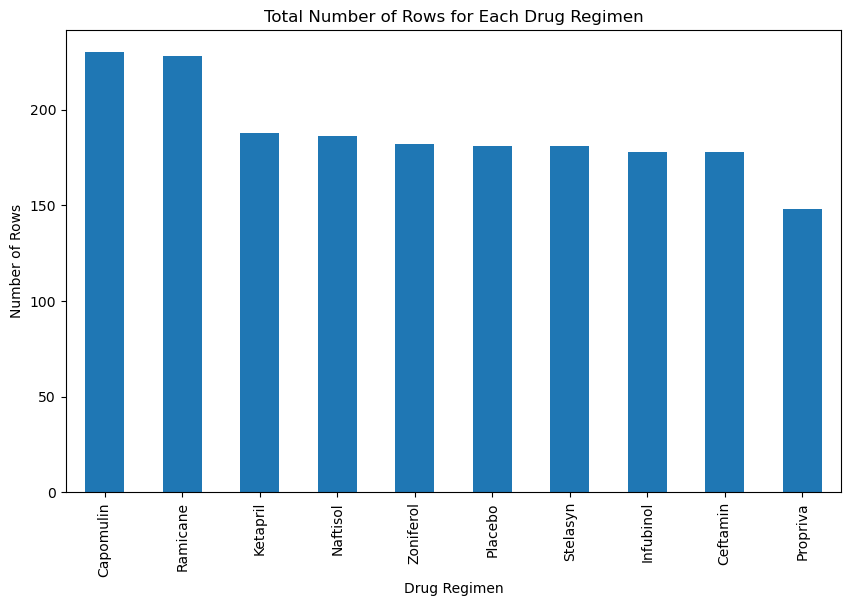

In [26]:
# Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate the bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), title='Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()


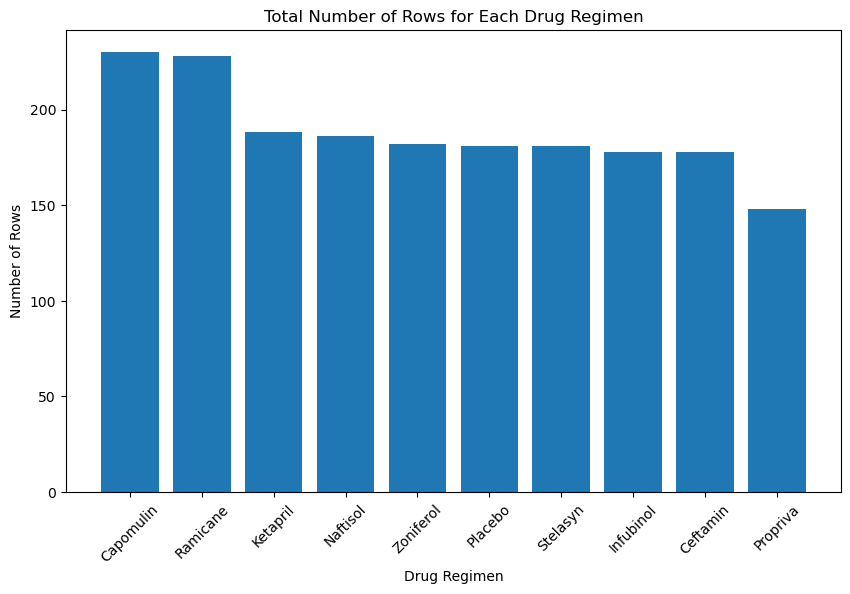

In [27]:
# Generate the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()


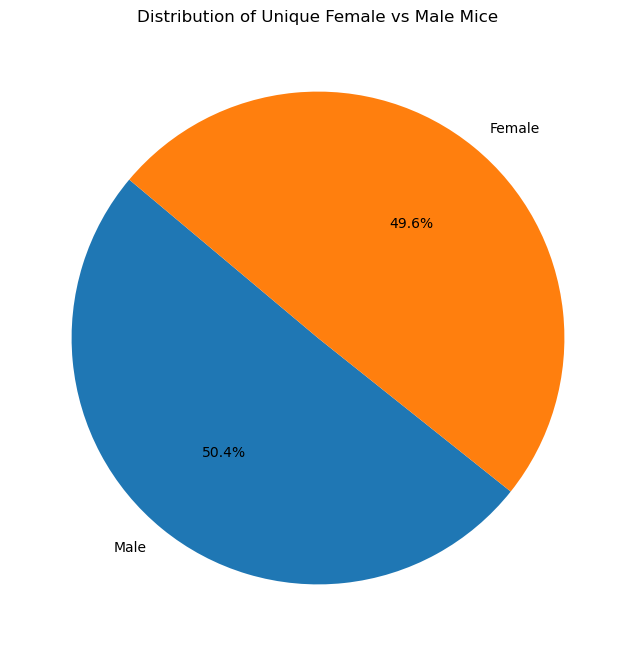

In [28]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
unique_mice_gender['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()



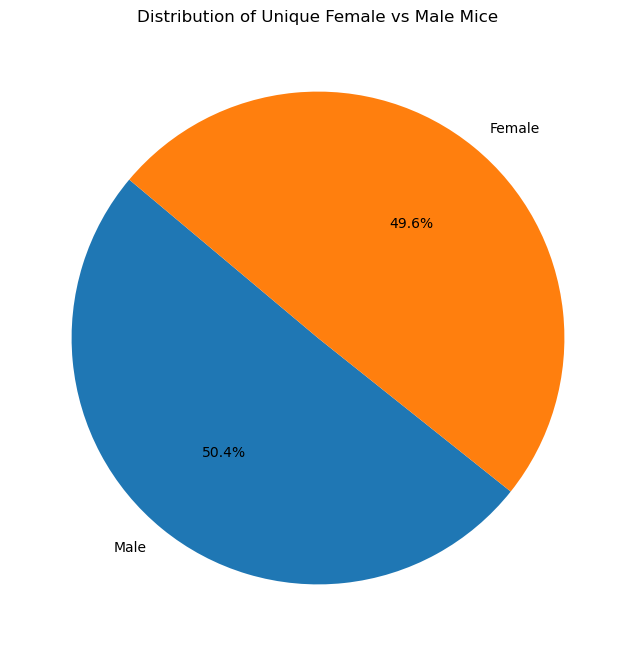

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
gender_counts = unique_mice_gender['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()



## Quartiles, Outliers and Boxplots

In [30]:
# Filter the data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume data
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(regimen_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/3f/vwk62qg16ylbl9xngy78rkxh0000gn/T/ipykernel_11055/4087859468.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatment_regimens)


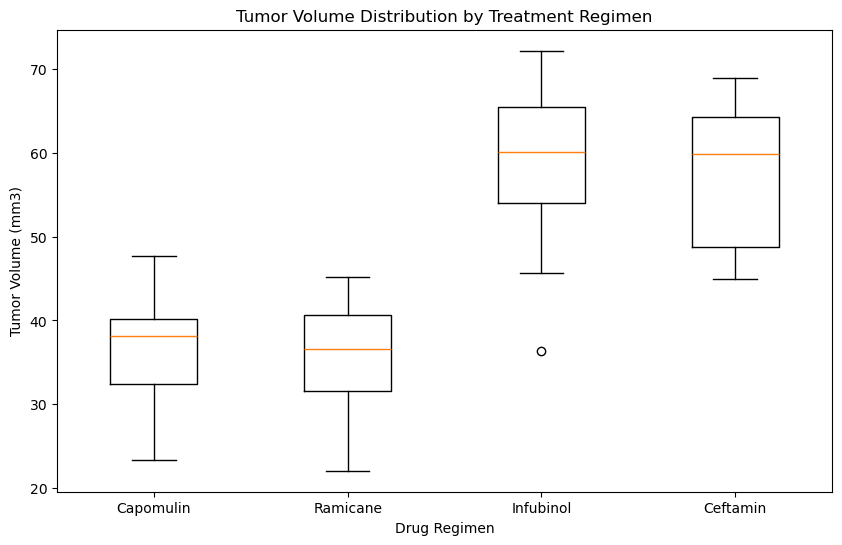

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

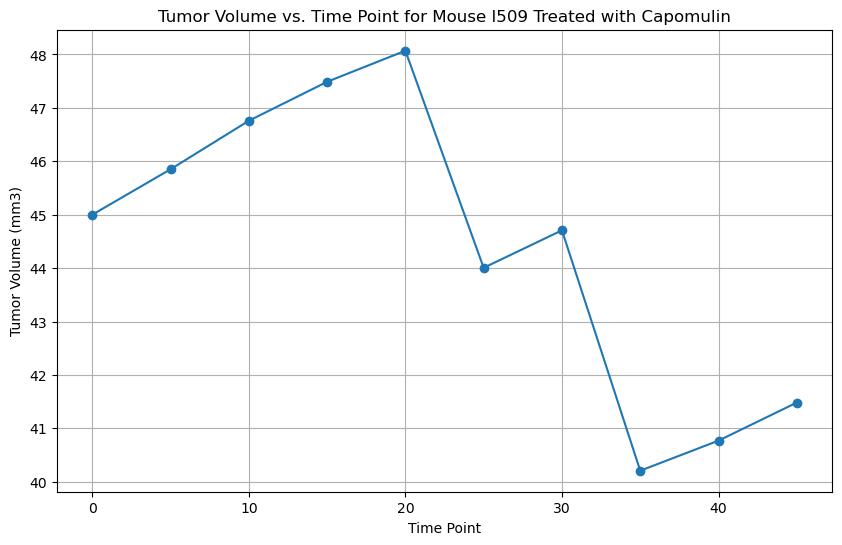

In [33]:
# Filter the data for the specific mouse ID
mouse_id = 'l509'
mouse_data = combined_data[combined_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


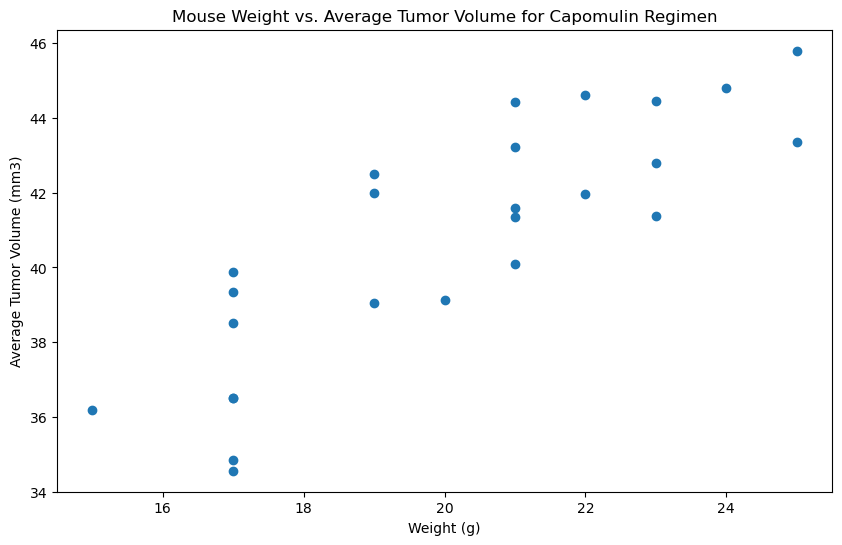

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight
capomulin_avg_tumor = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


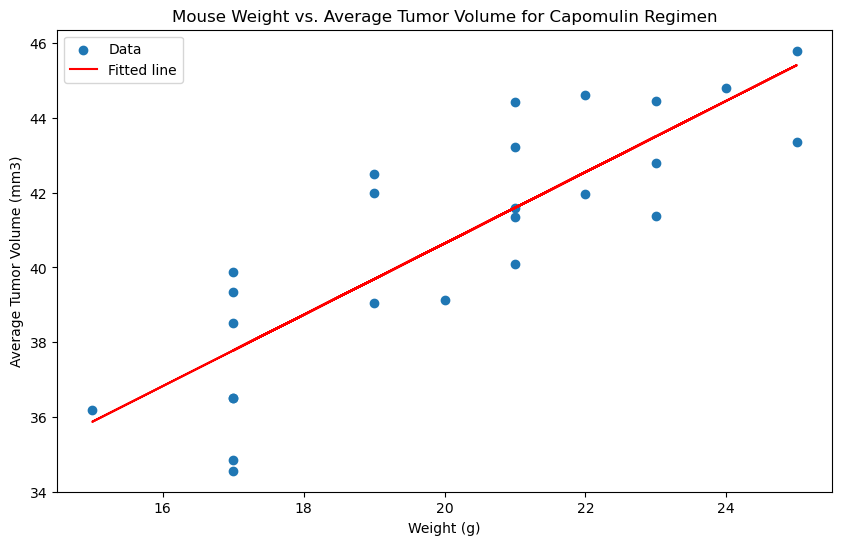

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


In [35]:
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = capomulin_avg_tumor['Weight (g)'].corr(capomulin_avg_tumor['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'])

# Plot the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor['Weight (g)'], capomulin_avg_tumor['Tumor Volume (mm3)'], label='Data')
plt.plot(capomulin_avg_tumor['Weight (g)'], intercept + slope * capomulin_avg_tumor['Weight (g)'], 'r', label='Fitted line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
